Gus Marquez DS687

Captain's OpenCV Object Detection in Image

(Help for these code can be found in OpenCV and MyGreatLearning)

Google Drive Mounted /content/drive/MyDrive/colab/

LOAD LIBRARIES and SETUP

In [2]:
# IMPORT
import numpy as np
import argparse
import cv2
import cv2
import numpy as np


In [3]:
# YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/colab/yolov3.weights", "/content/drive/MyDrive/colab/yolov3.cfg")
# Classes
classes = []
with open("/content/drive/MyDrive/colab/coco.names", "r") as f: 
  classes = [line.strip() for line in f.readlines()] 
outputlayers = net.getUnconnectedOutLayersNames() 


0.7409734 2 car
0.78628147 2 car
0.6256758 2 car
0.59571993 2 car
0.9994194 0 person
0.9996108 0 person
0.9723192 0 person
0.9811216 0 person
0.6646031 24 backpack
0.9912184 24 backpack
0.7098107 24 backpack
0.86912775 2 car


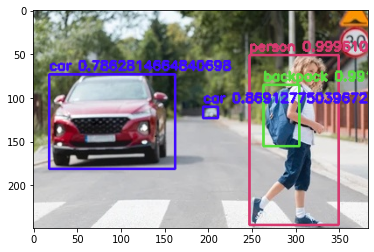

In [6]:
# GET PHOTO
img = cv2.imread("/content/drive/MyDrive/img77.jpg")

# SHAPE, BLOB and DETECT
height, width, channels = img.shape
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),     swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(outputlayers)

# DETECTION
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
        print(confidence, class_id, classes[class_id])
        # DETECTION
        center_x = int(detection[0] * width)
        center_y = int(detection[1] * height)
        w = int(detection[2] * width)
        h = int(detection[3] * height)
        # LOCATION
        x = int(center_x - w / 2)
        y = int(center_y - h / 2)
        # APPEND ALL
        boxes.append([x, y, w, h])
        confidences.append(float(confidence))
        class_ids.append(class_id)
    
# NMS
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# BOXES
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]]) + " " + str(confidences[i])
    color = colors[class_ids[i]]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX, 1/2, color, 2)
            
# DISPLAY
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()